# 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve,roc_auc_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os

# 2. Import the Dataset


In [2]:
df = pd.read_csv('data_response.csv')

# 3. Check the basic statistics of the whole dataset and give the
interpretations
Discuss the need of basic statistics in data science

In [3]:
df.shape

(10000, 13)

In [4]:
df.head()

Unnamed: 0     id  Gender  Age  Driving_License  Region_Code  \
0       10770  10771  Female   42                1         11.0   
1       19506  19507    Male   48                1         34.0   
2        6228   6229    Male   76                1         28.0   
3       18790  18791    Male   48                1         15.0   
4       25390  25391    Male   41                1         46.0   

   Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                   0    1-2 Year            Yes         48521.0   
1                   0    1-2 Year            Yes          2630.0   
2                   1    1-2 Year             No         29620.0   
3                   0    1-2 Year            Yes         29781.0   
4                   0    1-2 Year            Yes         23826.0   

   Policy_Sales_Channel  Vintage  Response  
0                 122.0      206         1  
1                 156.0      223         1  
2                  26.0       69         0  
3                  26.0      140         1  
4                 124.0      261         1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   id                    10000 non-null  int64  
 2   Gender                10000 non-null  object 
 3   Age                   10000 non-null  int64  
 4   Driving_License       10000 non-null  int64  
 5   Region_Code           10000 non-null  float64
 6   Previously_Insured    10000 non-null  int64  
 7   Vehicle_Age           10000 non-null  object 
 8   Vehicle_Damage        10000 non-null  object 
 9   Annual_Premium        10000 non-null  float64
 10  Policy_Sales_Channel  10000 non-null  float64
 11  Vintage               10000 non-null  int64  
 12  Response              10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

Unnamed: 0            id           Age  Driving_License  \
count  10000.000000  10000.000000  10000.000000     10000.000000   
mean    7351.088300   7352.088300     40.018900         0.998000   
std     7130.381057   7130.381057     14.850555         0.044679   
min        0.000000      1.000000     20.000000         0.000000   
25%     2499.750000   2500.750000     26.000000         1.000000   
50%     4999.500000   5000.500000     39.000000         1.000000   
75%     8036.250000   8037.250000     50.000000         1.000000   
max    28123.000000  28124.000000     84.000000         1.000000   

        Region_Code  Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count  10000.000000        10000.000000    10000.000000          10000.000000   
mean      26.447800            0.330000    31125.978400            106.871600   
std       12.719947            0.470236    16975.427752             55.389534   
min        0.000000            0.000000     2630.000000              1.000000   
25%       15.000000            0.000000    24867.250000             26.000000   
50%       28.000000            0.000000    32234.000000            124.000000   
75%       34.000000            1.000000    40251.500000            152.000000   
max       52.000000            1.000000   267698.000000            163.000000   

            Vintage      Response  
count  10000.000000  10000.000000  
mean     154.910000      0.350000  
std       83.716177      0.476993  
min       10.000000      0.000000  
25%       83.000000      0.000000  
50%      155.000000      0.000000  
75%      227.000000      1.000000  
max      299.000000      1.000000

# 4. Show the dependent variable (Response) distribution and write the observations of it.

In [7]:
#dependent variable

df['Response'].value_counts()/len(df)

0    0.65
1    0.35
Name: Response, dtype: float64

<AxesSubplot:xlabel='Response', ylabel='Density'>

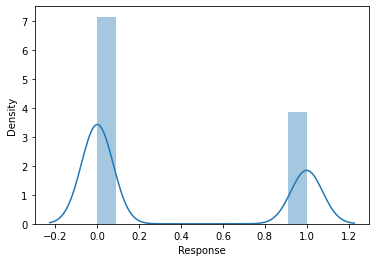

In [8]:
sns.distplot(df['Response'])

# 5. show that how the independent variables are distributed with dependent variable
Note: Use groupby or hue in plotting


In [9]:
VGD = df.groupby(['Gender','Age'])['Response'].count()
VGD

Gender  Age
Female  20      81
        21     183
        22     250
        23     303
        24     303
              ... 
Male    78      13
        79      16
        80      12
        83       1
        84       1
Name: Response, Length: 125, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Age'>

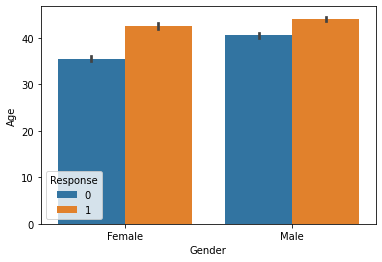

In [10]:
sns.barplot(x = 'Gender', y= 'Age' , hue = 'Response',data = df)

# 6. Do the required Data Preprocessing
Note:
1. Discuss about what is encoding why do we need encoding and Discuss about Lable
encoding and Onehot encoding
2. Convert all categorical columns into numerical by using

Lable encoder or

one hot encoder or

get dummies or

use any method of mapping

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
df = df.drop(columns = (['Unnamed: 0','id']),axis = 1)

In [13]:
df_dummy= pd.get_dummies(df,drop_first=True)

In [14]:
df_dummy.shape

(10000, 12)

In [15]:
df_dummy.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   42                1         11.0                   0         48521.0   
1   48                1         34.0                   0          2630.0   
2   76                1         28.0                   1         29620.0   
3   48                1         15.0                   0         29781.0   
4   41                1         46.0                   0         23826.0   

   Policy_Sales_Channel  Vintage  Response  Gender_Male  Vehicle_Age_< 1 Year  \
0                 122.0      206         1            0                     0   
1                 156.0      223         1            1                     0   
2                  26.0       69         0            1                     0   
3                  26.0      140         1            1                     0   
4                 124.0      261         1            1                     0   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                      0                   1  
1                      0                   1  
2                      0                   0  
3                      0                   1  
4                      0                   1

## 7. Devide the whole data into X and y
Note: 
Use that iloc or loc methods


In [16]:
df_dummy.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [17]:
df_dummy['Vehicle_Age_SM_1_Year'] = df_dummy['Vehicle_Age_< 1 Year']
df_dummy['Vehicle_Age_GR_2_Years'] = df_dummy['Vehicle_Age_> 2 Years']


In [18]:
df_dummy.drop(columns = (['Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years']),axis = 1 , inplace=True)

In [19]:
df_dummy.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Damage_Yes', 'Vehicle_Age_SM_1_Year',
       'Vehicle_Age_GR_2_Years'],
      dtype='object')

In [20]:
# Splitting data into independent and dependent
X = df_dummy[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured','Annual_Premium', 'Policy_Sales_Channel', 'Vintage','Gender_Male','Vehicle_Damage_Yes','Vehicle_Age_SM_1_Year','Vehicle_Age_GR_2_Years']]# independent variable

Y = df_dummy['Response'] # dependent variable

In [21]:
X.head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   42                1         11.0                   0         48521.0   
1   48                1         34.0                   0          2630.0   
2   76                1         28.0                   1         29620.0   
3   48                1         15.0                   0         29781.0   
4   41                1         46.0                   0         23826.0   

   Policy_Sales_Channel  Vintage  Gender_Male  Vehicle_Damage_Yes  \
0                 122.0      206            0                   1   
1                 156.0      223            1                   1   
2                  26.0       69            1                   0   
3                  26.0      140            1                   1   
4                 124.0      261            1                   1   

   Vehicle_Age_SM_1_Year  Vehicle_Age_GR_2_Years  
0                      0                       0  
1                      0                       0  
2                      0                       0  
3                      0                       0  
4                      0                       0

In [22]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Response, dtype: int64

# 8. split the data into train and test
Note:
Use train test split method
Discuss that why do we need train and test split in model fitting

In [23]:
# split the data into two parts training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)


In [24]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

# 9. Apply The Logistic Regression Model.


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(X_train,Y_train)


LogisticRegression()

In [27]:
?LogisticRegression

In [28]:
model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
# traning data
y_pred_train = model.predict_proba(X_train)
y_pred_train_1 = y_pred_train[:,1]

# 10.Find best threshold value using Log-Loss

In [30]:
from sklearn.metrics import log_loss


In [31]:

class predictor():
    def __init__(self):
        self.prob = 0.3 
        
    def threshold(self,y):
        if y <= self.prob:
            return 0
        else:
            return 1
        
predict = predictor()

In [32]:
probailites = np.linspace(0,1,num = 100)
pre = predictor() 

In [33]:
loss = []
for p in probailites:
    predict.prob = p 
    y_pred_class = np.array(list(map(predict.threshold,y_pred_train_1)))
    loss.append(log_loss(Y_train,y_pred_class))

In [34]:
loss

[22.337237216761018,
 15.444124465261728,
 12.828984683214529,
 11.876679230854272,
 11.782928953160777,
 11.763192052593725,
 11.615164841428019,
 11.289504725561413,
 11.003319096198139,
 10.825686876866467,
 10.736870367401915,
 10.618448735543199,
 10.500026875228068,
 10.366802453715852,
 10.25331493277069,
 10.154629744566208,
 10.075681571156977,
 10.036207541566466,
 9.947391374786525,
 9.89311478399893,
 9.848706757723063,
 9.794430166935465,
 9.769759041226651,
 9.73521946523431,
 9.715482564667258,
 9.710548339525495,
 9.680942988674918,
 9.680942988674918,
 9.680942988674918,
 9.680942988674918,
 9.685877099588476,
 9.680942874446712,
 9.680942760218509,
 9.666139627880403,
 9.636533934345211,
 9.62172988818147,
 9.56251804419827,
 9.444094470460078,
 9.365143784030355,
 9.266455283207943,
 9.128292410110408,
 9.088813011794294,
 8.970387267720218,
 8.81742217611021,
 8.679261016435738,
 8.610177980692109,
 8.53122740849059,
 8.486816412281412,
 8.536154323027276,
 8.531215

# 11. Find The Classification Metrics and Give the Observations to Metric for Logistic regression algorithms

* Discuss the every metric and why these metrics are usefull for model.

* Confusion Matrix

    * Precision

    * Recall

    * Specificity

    * Sensitivity

    * Accuracy

    * F1-score

    * True Positive Rate

    * False Positive Rate

Classification Report

ROC_AUC Curve

In [35]:
# Generate predictions

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [36]:
# Check accuracy metrics test data

print(classification_report(Y_test, predictions_test))
print('accuracy_score : ',accuracy_score(Y_test, predictions_test))

# confusion matrix

cm_test = confusion_matrix(y_true=Y_test, y_pred=predictions_test)
cm_test

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1973
           1       0.61      0.77      0.68      1027

    accuracy                           0.75      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.77      0.75      0.76      3000

accuracy_score :  0.752


array([[1468,  505],
       [ 239,  788]], dtype=int64)

In [37]:
# find False Positive Rate & True Positive Rate

FPR, TPR, _ = roc_curve(Y_train, predictions_train)
FPR1, TPR1, _ = roc_curve(Y_test,predictions_test)

In [38]:
print(FPR, TPR, _)
print(FPR1, TPR1, _)

[0.         0.25977469 1.        ] [0.         0.77921553 1.        ] [2 1 0]
[0.        0.2559554 1.       ] [0.         0.76728335 1.        ] [2 1 0]


In [39]:
# calculate AUC

auc_train = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train)

auc_test = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test)

Train AUC: 0.760
Test AUC: 0.756


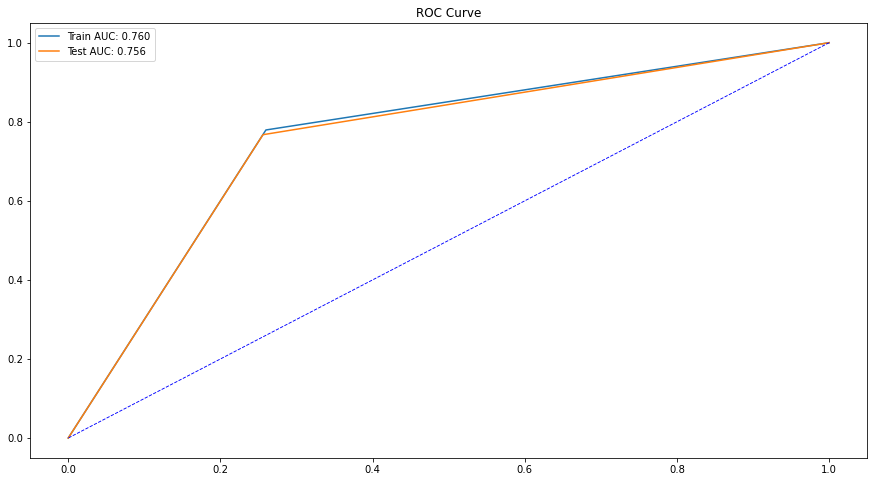

In [40]:
# plot the ROC curve

plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

In [41]:
# Check accuracy metrics of Train data
print(classification_report(Y_train, predictions_train))
print(accuracy_score(Y_train, predictions_train))

# confusion matrix

cm_test = confusion_matrix(y_true=Y_train, y_pred=predictions_train)
cm_test

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      4527
           1       0.62      0.78      0.69      2473

    accuracy                           0.75      7000
   macro avg       0.74      0.76      0.74      7000
weighted avg       0.78      0.75      0.76      7000

0.754


array([[3351, 1176],
       [ 546, 1927]], dtype=int64)

# 12. Apply Decision Tree model

In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
feature_name = list(X.columns)
class_name = list(Y_train.unique())
print("Feature names are:", feature_name)
print("Survived categories:",class_name)

Feature names are: ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male', 'Vehicle_Damage_Yes', 'Vehicle_Age_SM_1_Year', 'Vehicle_Age_GR_2_Years']
Survived categories: [0, 1]


# 13. Visualize the tree

In [44]:
# Create a dot file while stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name, rounded=True, filled=True)

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("TitanicDTree.png")
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.69171 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.69171 to fit



# 14. Find The Classification Metrics and Give the Observations to Metric for Decision Tree algorithms

* Confusion Matrix

    * Precision

    * Recall

    * Specificity

    * Sensitivity

    * Accuracy

    * F1-score

    * True Positive Rate

    * False Positive Rate

* Classification Report

* ROC_AUC Curve


In [45]:
y_test_pred_clf = clf.predict(X_test)
y_test_pred_clf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
predictions_train_clif = clf.predict(X_train)
predictions_test_clif = clf.predict(X_test)

In [47]:
# Check accuracy metrics test data

print(classification_report(Y_test, y_test_pred_clf))
print('accuracy_score : ',accuracy_score(Y_test,y_test_pred_clf))

# confusion matrix

confusion_mat_clf = confusion_matrix(Y_test,y_test_pred_clf)
confusion_mat_clf

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1973
           1       0.58      0.58      0.58      1027

    accuracy                           0.71      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.71      0.71      0.71      3000

accuracy_score :  0.7116666666666667


array([[1542,  431],
       [ 434,  593]], dtype=int64)

In [48]:
# find False Positive Rate & True Positive Rate

FPR_1, TPR_1, A = roc_curve(Y_train, predictions_train_clif)
FPR_2, TPR_2, B = roc_curve(Y_test,predictions_test_clif)

In [49]:
FPR_1, TPR_1, A
FPR_2, TPR_2, B

(array([0.        , 0.21844906, 1.        ]),
 array([0.        , 0.57740993, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [50]:
# calculate AUC

auc_train_clf = auc(FPR_1, TPR_1)
print('Train AUC: %0.3f' % auc_train_clf)

auc_test_clf = auc(FPR_2, TPR_2)
print('Test AUC: %0.3f' % auc_test_clf)

Train AUC: 1.000
Test AUC: 0.679


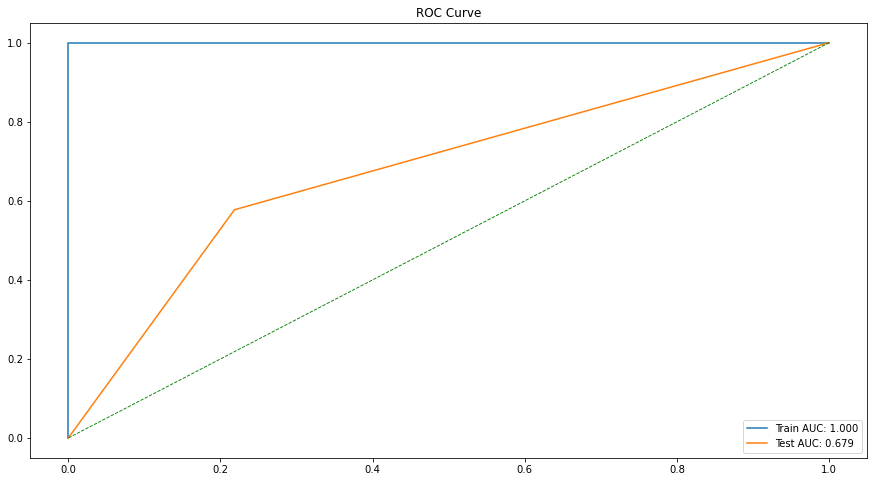

In [51]:
# plot the ROC curve

plt.figure(figsize=(15,8))
plt.plot(FPR_1, TPR_1, label = 'Train AUC: %0.3f'%auc_train_clf)
plt.plot(FPR_2, TPR_2, label = 'Test AUC: %0.3f'%auc_test_clf)

plt.plot([1,0],[1,0], ls = '--', color = 'green', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

# 15. Try to find out according to metrics which algorithm isappropriate for the given data

### Logistic regression 
    precision    recall  f1-score   support

           0       0.86      0.74      0.80      1973
           1       0.61      0.77      0.68      1027

    accuracy                           0.75      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.77      0.75      0.76      3000

accuracy_score :  0.752

array([[1468,  505],
       [ 239,  788]], dtype=int64)
       
Train AUC: 0.760

Test AUC: 0.756

### Decision Tree
    precision    recall  f1-score   support

           0       0.78      0.78      0.78      1973
           1       0.58      0.58      0.58      1027

    accuracy                           0.71      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.71      0.71      0.71      3000

accuracy_score :  0.7116666666666667
    
array([[1542,  431],
       [ 434,  593]], dtype=int64)
       
Train AUC: 1.000

Test AUC: 0.679

for the Given data i tested Two model,
one is Logistic Regression Model and another is Tree model,
and after checking all those 2 model precision,recall,f1-score,support,accuracy,macro avg,weighted avg,accuracy_score,Train AUC,Test AUC, 
and then i found that The Logistic Regression Model is better Curve and accuracy ponint than Tree Model.

